In [2]:
# Importing all the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\azama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\azama\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
df = pd.read_csv("fake_job_postings.csv", engine='python')
print(df.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# was checking either the salary range matters for fake and real jobs
# but it does not matter
# both the real and fake jobs have almost same salary range
non_nan_salaries = df[(df['salary_range'].notna()) & (df['fraudulent'] == 1)]

(non_nan_salaries.head())


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
357,358,Financing Auto(car) sales,"US, IL, hazelcrest",hr,35000-73000,Looking for adventurous people to join a thriv...,If you have experience in financing for auto s...,prior car sales expprior car loan financing exp,profit sharingcar allowancecompany car,0,0,0,Contract,Associate,NaN,Automotive,NaN,1
493,494,Admin Assistant/ Receptionist,"US, CA, Los Angeles",NaN,23040-28800,NaN,"A Newly established company seeks outgoing, fr...","Must have good knowledge of Outlook, Microsoft...",NaN,0,0,0,Full-time,Entry level,High School or equivalent,Computer Software,Administrative,1
628,629,UST Testing Technician II,"US, CA, Bakersfield",Oil & Energy,65000-75000,Jaco Oil and Refined Resources have partnered ...,Qualified candidates are encouraged to apply d...,Job site set-up.Loading and unloading of equip...,Competitive compensation package including bas...,0,1,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1


In [6]:
print(df.describe())

             job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [7]:
# so we decided to drop salary range since no need for it
# job id is also useless
df.drop(['job_id', 'salary_range'], axis=1, inplace=True)
print(df.head())

                                       title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever        NaN   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth        NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, locat

In [8]:
df.fillna('', inplace=True)

In [9]:
print(df.isna().sum())

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


In [10]:
def clean_text(text):
    # to parse and extract data from html tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Remove text in square brackets\
    text = re.sub(r'\[[^]]*\]', '', text)


    # remove any character that is not a letter and converts them in lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

    # Remove stopwords like 'the', 'a', 'is', 'and' etc
    stop = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop])

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text



📝 TEXT FEATURES:
  title                     | AUC: 0.9007 | Acc: 0.8697 | F1: 0.3668
  location                  | AUC: 0.8164 | Acc: 0.7645 | F1: 0.2247
  department                | AUC: 0.6916 | Acc: 0.9114 | F1: 0.2611
  company_profile           | AUC: 0.9440 | Acc: 0.8434 | F1: 0.3778
  description               | AUC: 0.9452 | Acc: 0.9069 | F1: 0.4585
  salary_range              | AUC: 0.5004 | Acc: 0.9516 | F1: 0.0000
  requirements              | AUC: 0.8958 | Acc: 0.7556 | F1: 0.2530
  benefits                  | AUC: 0.8645 | Acc: 0.5520 | F1: 0.1699
  employment_type           | AUC: 0.5600 | Acc: 0.7260 | F1: 0.1042
  required_experience       | AUC: 0.5883 | Acc: 0.4214 | F1: 0.1124
  required_education        | AUC: 0.6333 | Acc: 0.4245 | F1: 0.1160
  industry                  | AUC: 0.7764 | Acc: 0.5618 | F1: 0.1525
  function                  | AUC: 0.6830 | Acc: 0.4284 | F1: 0.1265

🔢 BINARY FEATURES:
  telecommuting             | AUC: 0.5081 | Acc: 0.9097 | F1: 0.0

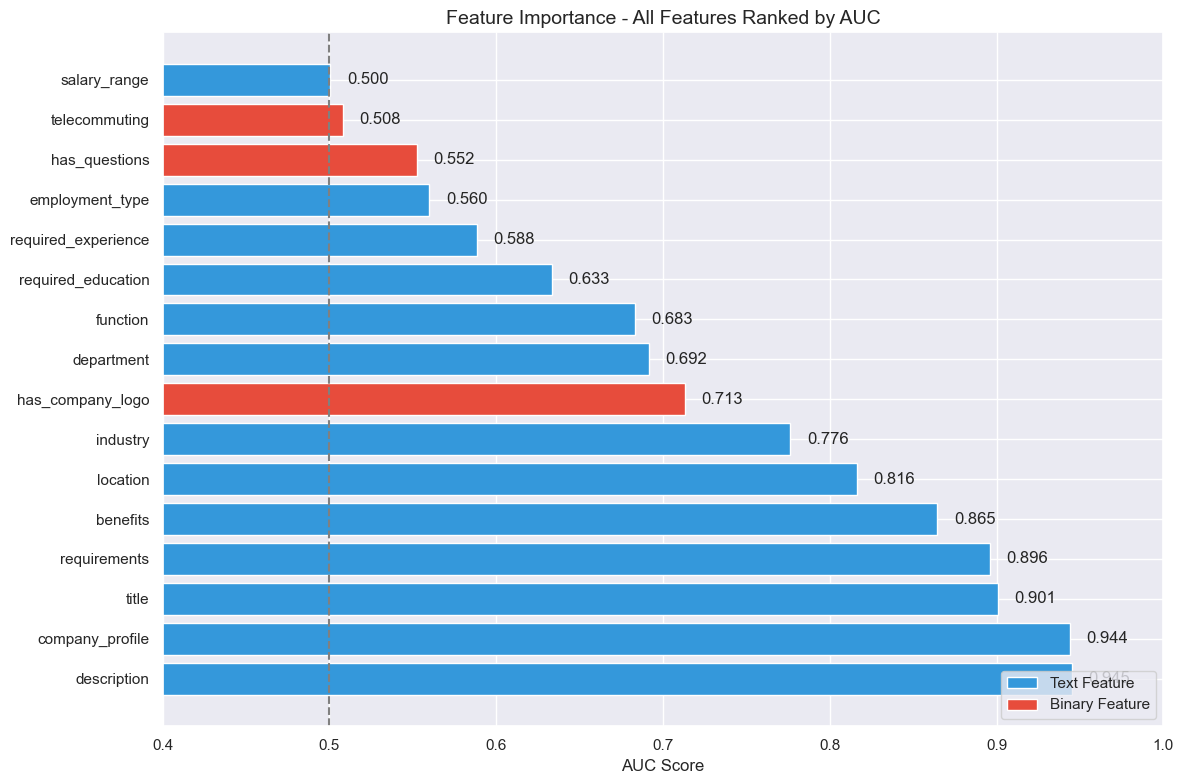


🔥 TOP 5 MOST IMPORTANT FEATURES:
  1. description (Text) - AUC: 0.9452
  2. company_profile (Text) - AUC: 0.9440
  3. title (Text) - AUC: 0.9007
  4. requirements (Text) - AUC: 0.8958
  5. benefits (Text) - AUC: 0.8645
  6. location (Text) - AUC: 0.8164
  7. industry (Text) - AUC: 0.7764


In [24]:

df_fresh = pd.read_csv("fake_job_postings.csv", engine='python')

# Separate features by type
text_features = ['title', 'location', 'department', 'company_profile', 
                 'description', 'salary_range', 'requirements', 'benefits', 
                 'employment_type', 'required_experience', 'required_education', 
                 'industry', 'function']

binary_features = ['telecommuting', 'has_company_logo', 'has_questions']

results = []

# Analyze TEXT features 
print("\n📝 TEXT FEATURES:")

df_fresh.fillna('', inplace=True)

for feature in text_features:
    X = df_fresh[feature].apply(clean_text)
    y = df_fresh['fraudulent']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    tfidf = TfidfVectorizer(max_features=1000, min_df=5)
    X_train_vec = tfidf.fit_transform(X_train)
    X_test_vec = tfidf.transform(X_test)
    
    lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    lr.fit(X_train_vec, y_train)
    
    y_pred = lr.predict(X_test_vec)
    y_pred_proba = lr.predict_proba(X_test_vec)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Feature': feature,
        'Type': 'Text',
        'Accuracy': acc,
        'AUC': auc,
        'F1-Score': f1
    })
    print(f"  {feature:25} | AUC: {auc:.4f} | Acc: {acc:.4f} | F1: {f1:.4f}")

# BINARY features
print("\n🔢 BINARY FEATURES:")

for feature in binary_features:
    X_feat = df_fresh[[feature]].values
    y_feat = df_fresh['fraudulent']
    
    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
        X_feat, y_feat, test_size=0.2, random_state=42, stratify=y_feat
    )
    
    lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    lr.fit(X_train_f, y_train_f)
    
    y_pred = lr.predict(X_test_f)
    y_pred_proba = lr.predict_proba(X_test_f)[:, 1]
    
    acc = accuracy_score(y_test_f, y_pred)
    auc = roc_auc_score(y_test_f, y_pred_proba)
    f1 = f1_score(y_test_f, y_pred)
    
    results.append({
        'Feature': feature,
        'Type': 'Binary',
        'Accuracy': acc,
        'AUC': auc,
        'F1-Score': f1
    })
    print(f"  {feature:25} | AUC: {auc:.4f} | Acc: {acc:.4f} | F1: {f1:.4f}")

# Create and sort results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('AUC', ascending=False).reset_index(drop=True)

# Final Ranking
print("\n\n FINAL RANKING by AUC")
print(results_df.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#e74c3c' if t == 'Binary' else '#3498db' for t in results_df['Type']]
bars = ax.barh(results_df['Feature'], results_df['AUC'], color=colors)
ax.set_xlabel('AUC Score', fontsize=12)
ax.set_title('Feature Importance - All Features Ranked by AUC', fontsize=14)
ax.axvline(x=0.5, color='gray', linestyle='--', label='Random (0.5)')
ax.set_xlim(0.4, 1.0)

# Add value labels
for i, (bar, auc) in enumerate(zip(bars, results_df['AUC'])):
    ax.text(auc + 0.01, bar.get_y() + bar.get_height()/2, f'{auc:.3f}', va='center')

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498db', label='Text Feature'),
                   Patch(facecolor='#e74c3c', label='Binary Feature')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# Top 5
print("\n🔥 TOP 5 MOST IMPORTANT FEATURES:")
for i, row in results_df.head(7).iterrows():
    print(f"  {i+1}. {row['Feature']} ({row['Type']}) - AUC: {row['AUC']:.4f}")

In [12]:
# since the top most features are description, title, requirements, company_profile, benefits

print("start")

# Convert has_company_logo to text (Yes/No)
df['logo_text'] = df['has_company_logo'].apply(lambda x: 'company has logo yes' if x == 1 else 'company has logo no')


df['text'] = df[['title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'logo_text']].agg(' '.join, axis=1)

print(df[['text', 'fraudulent']].head())
df['text'] = df['text'].apply(clean_text)

print("end")

start
                                                text  fraudulent
0  marketing intern food weve created groundbreak...           0
1  customer service cloud video production second...           0
2  commissioning machinery assistant cma valor se...           0
3  account executive washington dc passion improv...           0
4  bill review manager spotsource solution llc gl...           0
end


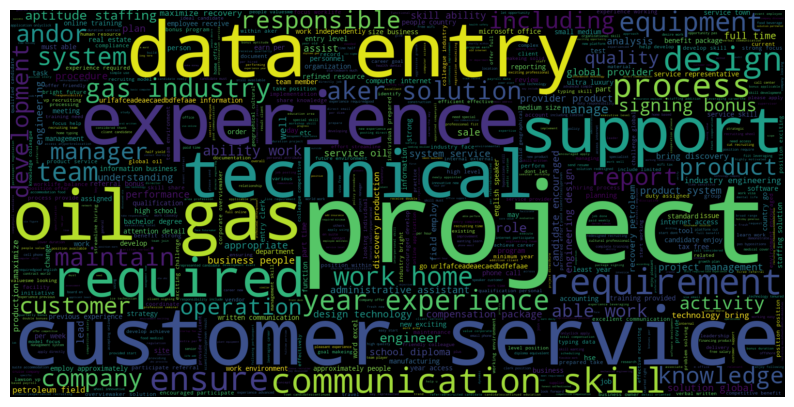

done


In [13]:
# TO check the high frequency of the fraudulent data - the fake job
plt.figure(figsize=(10, 6))
wc = WordCloud(max_words=3000, width=1600, height=800).generate(" ".join(df[df.fraudulent == 1].text))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

print("done")

(np.float64(-0.5), np.float64(1599.5), np.float64(799.5), np.float64(-0.5))

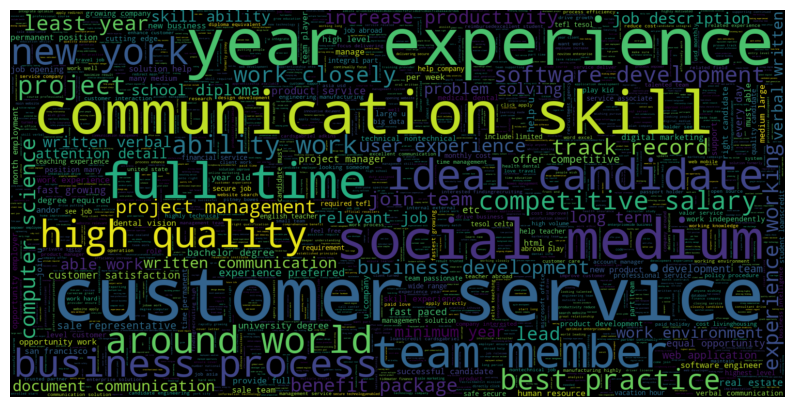

In [14]:
# to check the high frequency of the correct job description
plt.figure(figsize=(10, 6))
wc = WordCloud(max_words=3000, width=1600, height=800).generate(" ".join(df[df.fraudulent == 0].text))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

<Axes: xlabel='fraudulent', ylabel='count'>

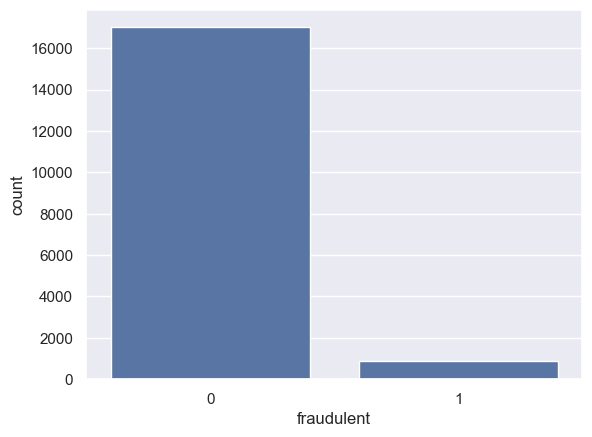

In [15]:
sns.set(style="darkgrid")
sns.countplot(x='fraudulent', data=df)

In [16]:
# equal distribution of testing and training datasets, focusing on fraudulents
X = df['text']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set: {X_train.shape[0]}  samples: {y_train.mean():.2%} fraud")
print(f"Test set: {X_test.shape[0]}  samples: {y_test.mean():.2%} fraud")

Train set: 14304  samples: 4.84% fraud
Test set: 3576  samples: 4.84% fraud


In [17]:

tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (14304, 5000)
Shape of X_test_tfidf: (3576, 5000)


In [18]:

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
# model.add(Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary() 


c:\Users\azama\VS Code\PROJECTS\ML-Project\.mlvenv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     1,280,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,324,161 (5.05 MB)

 Trainable params: 1,324,161 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

history = model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=32, validation_split=0.2)

Shape of X_train_resampled: (27222, 5000)
Shape of y_train_resampled: (27222,)
Epoch 1/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9748 - loss: 0.0759 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 2/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9988 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 8.3299e-04
Epoch 3/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9983 - val_loss: 0.0055
Epoch 4/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9991 - val_loss: 0.0020
Epoch 5/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9998 - loss: 4.4765e-04 - val_accuracy: 1.0000 - val_loss: 3.2667e-04


Test Accuracy: 0.9829
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[3379   24]
 [  37  136]]


<Axes: xlabel='Predicted', ylabel='Actual'>

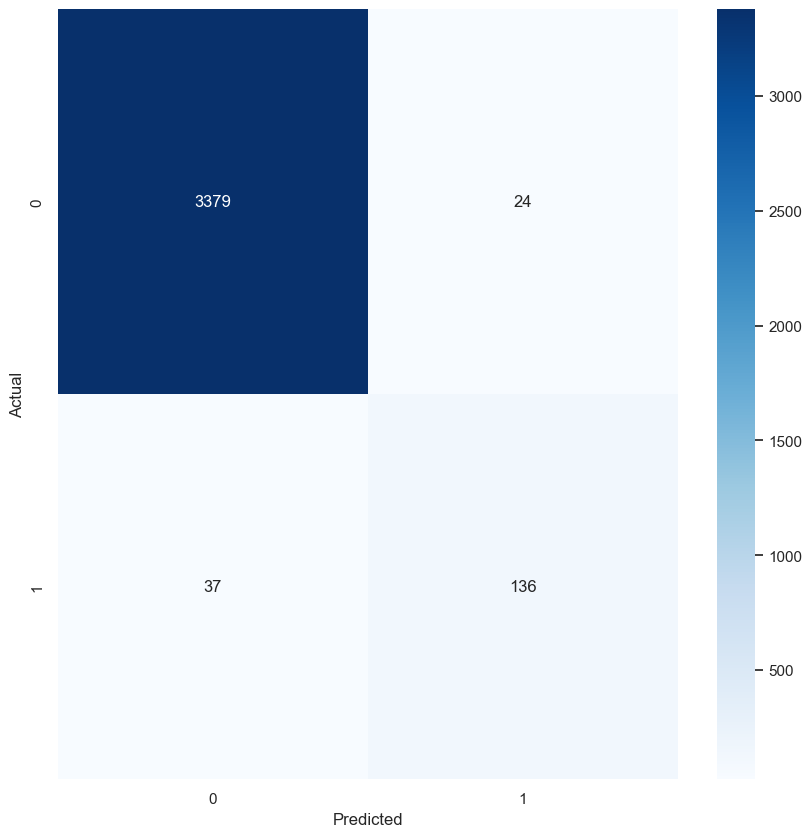

In [21]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_tfidf, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Get predictions
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",annot = True, fmt='')

In [22]:

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.85      0.79      0.82       173

    accuracy                           0.98      3576
   macro avg       0.92      0.89      0.90      3576
weighted avg       0.98      0.98      0.98      3576



In [28]:
import joblib

# Save the TF-IDF vectorizer
vectorizer_path = 'tfidf_vectorizer.pkl'
joblib.dump(tfidf_vectorizer, vectorizer_path)
print(f"[INFO] TF-IDF Vectorizer saved to {vectorizer_path}")

# Save the Keras model
model_path = 'fake_job_detector_model.h5'
model.save(model_path)
print(f"[INFO] Model saved to {model_path}")

[INFO] TF-IDF Vectorizer saved to tfidf_vectorizer.pkl
[INFO] Model saved to fake_job_detector_model.h5


In [ ]:
# Test with a suspicious job posting
test_title = "Data Entry Worker — Immediate Hiring! Earn up to $500/day"
test_location = "Karachi, Pakistan"
test_company_profile = "A global business expansion group that claims to partner with major companies, but provides no verifiable details, website, or registration number."
test_description = "We urgently need workers to process data for international clients. No experience required. Just send your personal information and follow the simple tasks. Limited seats available. Hurry! Work from anywhere."
test_requirements = "– No skills needed – Must be able to provide personal ID details – Must be available to start immediately – Internet connection required"
test_benefits = "– Guaranteed daily income – Flexible hours – Exclusive rewards for fast responders"
test_has_logo = "company has logo no"  # No company logo (suspicious)

# Combine all text fields (matching the training data format)
test_text = ' '.join([test_title, test_location, test_company_profile, test_description, test_requirements, test_benefits, test_has_logo])

# Clean the text
test_text_cleaned = clean_text(test_text)

print("Cleaned text:")
print(test_text_cleaned[:200] + "...\n")

# Predict using the pipeline (single line!)
prediction = pipeline.predict([test_text_cleaned])[0]
prediction_proba = pipeline.predict_proba([test_text_cleaned])[0]

print("="*60)
print("PREDICTION RESULTS")
print("="*60)
print(f"Fraudulent Probability: {prediction_proba:.4f} ({prediction_proba*100:.2f}%)")
print(f"Real Job Probability: {1-prediction_proba:.4f} ({(1-prediction_proba)*100:.2f}%)")

print(f"\nPrediction: {'FRAUDULENT ⚠️' if prediction == 1 else 'LEGITIMATE ✓'}")
print("="*60)

Original combined text:
Data Entry Worker — Immediate Hiring! Karachi, Pakistan A global business expansion group that claims to partner with major companies, but provides no verifiable details, website, or registration numb...

Cleaned text:
data entry worker immediate hiring karachi pakistan global business expansion group claim partner major company provides verifiable detail website registration number urgently need worker process data...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
PREDICTION RESULTS
Fraudulent Probability: 0.9997 (99.97%)
Real Job Probability: 0.0003 (0.03%)

Prediction: FRAUDULENT ⚠️
